<h1 align = 'center'>Regression Algorithms</h1>

Note: This notebook is an excerpt from the Machine learning tutorial on <a href = https://pythonprogramming.net/machine-learning-tutorial-python-introduction/> programming.net</a> and the book titled: <b>Introduction to Machine learning</b> by Andreas C.Muller and Sarah Guido

<div class="alert alert-info">
Regression is a machine learning algorithm  that allow us to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Briefly, the goal of regression model is to build a mathematical equation that defines y as a function of the x variables.
</div>

<div class="alert alert-info">
The data that we're going to be working with is the Boston housing Dataset.
It is one of the preloaded dataset in the Sklearn library which you can access using the import statement below:<br>
    <b>from sklearn.datasets import load_boston</b>
 

<p>We would explore different regression algorithms and compare their accuracy</p>
</div>

In [3]:
from sklearn.datasets import load_boston
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
boston = load_boston()
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

<div class="alert alert-info">
Before we build our model, let's take a look at what our dataset looks like.
</div>

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print(boston.data.shape)

(506, 13)


<div class="alert alert-info">
We will use the extended boston data set. It has additional features which are derived from the original 13 features</div>

In [9]:
X,y = mglearn.datasets.load_extended_boston()

In [10]:
print(X.shape)     #The resulting 104 features are derived from the original 13 faetures

(506, 104)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

<h3>Simple Linear regression</h3>

In [12]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
training_set_score = clf.score(X_train, y_train)
test_set_score = clf.score(X_test, y_test)

In [14]:
print(training_set_score)
print(test_set_score)

0.9520519609032733
0.6074721959665925


<h3>Simple Linear regression from scratch</h3>

In [26]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import random

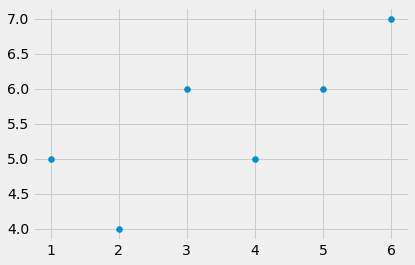

In [27]:
xs = np.array([1,2,3,4,5,6], dtype = np.float64)
ys = np.array([5,4,6,5,6,7], dtype = np.float64)
plt.scatter(xs, ys)
plt.show()

In [28]:
def best_fit_slope_and_intercept(xs, ys):
    m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs))**2 - mean(xs**2)))
    b = mean(ys) - (m*mean(xs))
    return m,b
m,b = best_fit_slope_and_intercept(xs,ys)
print(m,b)

0.42857142857142866 4.0


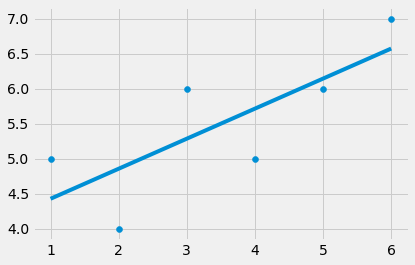

In [29]:
regression_line = [(m * x) + b for x in xs]


plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()

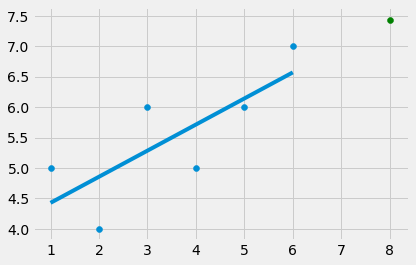

In [30]:
predict_x = 8
predict_y = (m*predict_x) + b

plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y, color = "green")
plt.plot(xs, regression_line)
plt.show()

In [31]:
#determing accuracy of our line using R squared

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coficient_of_determmination(ys_orig, ys_line):
    ys_mean_line = [mean(ys_orig) for y in ys_orig]
    squarred_error_regr = squared_error(ys_orig, ys_line)
    squarred_error_y_mean = squared_error(ys_orig, ys_mean_line)
    return 1 - (squarred_error_regr/squarred_error_y_mean)

r_squared = coficient_of_determmination(ys, regression_line)
print(r_squared)

0.5844155844155845


<h3>Testing assumptions</h3>

In [32]:
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == "pos":
            val+= step
        elif correlation and correlation == "neg":
            val-= step
    xs =  [i for i in range(len(ys))]
    return np.array(xs, dtype = np.float64), np.array(ys, dtype = np.float64)


xs, ys = create_dataset(40, 20, 2, correlation = "neg")

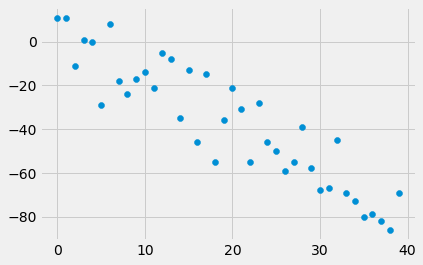

In [33]:
plt.scatter(xs, ys)
plt.show()

In [34]:
def best_fit_slope_and_intercept(xs, ys):
    m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs))**2 - mean(xs**2)))
    b = mean(ys) - (m*mean(xs))
    return m,b
m,b = best_fit_slope_and_intercept(xs,ys)
print(m,b)

-2.1958724202626643 5.919512195121953


In [ ]:
regression_line = [(m * x) + b for x in xs]

plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()

predict_x = 8
predict_y = (m*predict_x) + b

plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y, s= 150, color = "green")
plt.plot(xs, regression_line)
plt.show()

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coficient_of_determmination(ys_orig, ys_line):
    ys_mean_line = [mean(ys_orig) for y in ys_orig]
    squarred_error_regr = squared_error(ys_orig, ys_line)
    squarred_error_y_mean = squared_error(ys_orig, ys_mean_line)
    return 1 - (squarred_error_regr/squarred_error_y_mean)

r_squared = coficient_of_determmination(ys, regression_line)
print(r_squared)

<h3>Ridge regression</h3>

In [15]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
training_set_score = ridge.score(X_train, y_train)
test_set_score = ridge.score(X_test, y_test)

print(training_set_score)
print(test_set_score)

0.8857966585170941
0.7527683481744751


In [17]:
#The paramaeter that is tuned here is alpha. By default, alpha is 1
#Very small values of alpha has no effect. Infact, it's no different from a linear regression
ridge_1 = Ridge(alpha = 0.1)
ridge_1.fit(X_train, y_train)

training_set_score = ridge_1.score(X_train, y_train)
test_set_score = ridge_1.score(X_test, y_test)

print(training_set_score)
print(test_set_score)

0.9282273685001985
0.7722067936479954


In [18]:
ridge_10 = Ridge(alpha = 10)
ridge_10.fit(X_train, y_train)

training_set_score = ridge_10.score(X_train, y_train)
test_set_score = ridge_10.score(X_test, y_test)

print(training_set_score)
print(test_set_score)

0.7882787115369614
0.6359411489177309


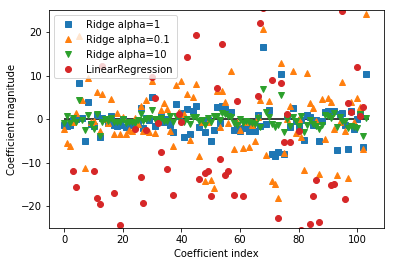

In [19]:
plt.plot(ridge.coef_, "s", label = "Ridge alpha=1")
plt.plot(ridge_1.coef_, "^", label = "Ridge alpha=0.1")
plt.plot(ridge_10.coef_, "v", label = "Ridge alpha=10")

plt.plot(clf.coef_, "o", label = "LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0, len(clf.coef_))
plt.ylim(-25, 25)
plt.legend()

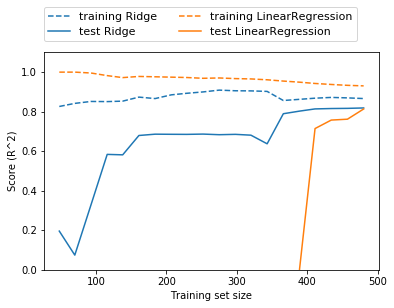

In [20]:
mglearn.plots.plot_ridge_n_samples()

<h3>Lasso regression</h3>

In [21]:
lasso = Lasso()
lasso.fit(X_train, y_train)

training_set_score = lasso.score(X_train, y_train)
test_set_score = lasso.score(X_test, y_test)

print(training_set_score)
print(test_set_score)

0.29323768991114596
0.20937503255272272


In [22]:
#To get the number of features used in the lasso model
no_of_features= np.sum(lasso.coef_ != 0)
print(no_of_features)

4


In [23]:
#Lasso did badly with the default value of 1. We can also see that it used only 4 out of 105 features
lasso_1 = Lasso(alpha = 0.01, max_iter = 100000)
lasso_1.fit(X_train, y_train)

training_set_score = lasso_1.score(X_train, y_train)
test_set_score = lasso_1.score(X_test, y_test)

print(training_set_score)
print(test_set_score)

no_of_features= np.sum(lasso_1.coef_ != 0)
print(no_of_features)

0.8962226511086501
0.7656571174549986
33


In [24]:
lasso_2 = Lasso(alpha = 0.0001, max_iter = 100000)
lasso_2.fit(X_train, y_train)

training_set_score = lasso_2.score(X_train, y_train)
test_set_score = lasso_2.score(X_test, y_test)

print(training_set_score)
print(test_set_score)

no_of_features= np.sum(lasso_2.coef_ != 0)
print(no_of_features)

0.9507158754515463
0.6437467421272751
96


(-25, 25)

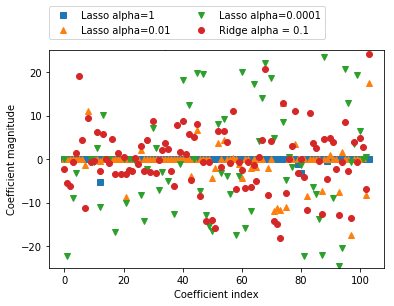

In [25]:
plt.plot(lasso.coef_, "s", label = "Lasso alpha=1")
plt.plot(lasso_1.coef_, "^", label = "Lasso alpha=0.01")
plt.plot(lasso_2.coef_, "v", label = "Lasso alpha=0.0001")

plt.plot(ridge_1.coef_, "o", label = "Ridge alpha = 0.1")

plt.legend(ncol=2, loc=(0,1.05))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
# plt.hlines(0,0, len(clf.coef_))
plt.ylim(-25, 25)


<h3>References</h3>

<li>Machine learning tutorial on <a href = https://pythonprogramming.net/machine-learning-tutorial-python-introduction/> programming.net</a></li>

<li><b>Introduction to Machine learning</b> by Andreas C.Muller and Sarah Guido</li>